In [2]:
import requests
import pandas                        as pd
import numpy                         as np
import math

import import_ipynb
import EDA

import seaborn                       as sns
import matplotlib.pyplot             as plt

from googletrans                     import Translator
translator = Translator()

from collections                     import Counter
import itertools
import re

import stanfordnlp

In [48]:
def to_monolingual(df, dest):
    monol = []
    for i in range(df.shape[0]):
        sentence=df.iloc[i, 1]
#         " ".join(sentence.split().apply(lambda x : translator.translate(x, src="hi", dest="hi").text.lower()))
        monol.append(" ".join([translator.translate(x, dest=dest).text.lower() for x in sentence.split()]))
    df["monolingual"] = monol

In [50]:
def barplot(df, x, y, title, label, ylabel, dim, orient = "v", ci = False, hue = None):
    
    plt.figure(figsize = dim, facecolor = "white")
    sns.barplot(x = x, y = y, data = df, orient = orient, ci = ci, hue = hue)
    plt.title(f"{title}", size = 18)
    plt.xlabel(f"{label}", size = 16)
    plt.ylabel(f"{ylabel}", size = 16)
    plt.xticks(size = 14)
    plt.yticks(size = 14)
    plt.tight_layout();

## HINDI

In [21]:
hin_train = pd.read_csv('Data/trac2_hin_train.csv')
hin_test = pd.read_csv('Data/trac2_hin_dev.csv')
hin = hin_train.append(hin_test)
hin.head()

,ID,Text,Sub-task A,Sub-task B
0,C4.131,Bollywood film dekhne ke samay logic ghar mein...,NAG,NGEN
1,C4.638,Chutiya movie...,NAG,NGEN
2,C38.598,Us jaat bnde ka khene ka matlab tha mar daluga...,OAG,NGEN
3,C4.2101.1,@Feminism Is CANCER *un feminist yeh sahi hai ...,OAG,NGEN
4,C29.14.2,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,NAG,NGEN


In [49]:
to_monolingual(hin, dest='hi')

/home/rachit/anaconda3/envs/ML/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,ID,Text,Sub-task A,Sub-task B,monolingual
0,C4.131,Bollywood film dekhne ke samay logic ghar mein...,NAG,NGEN,बॉलीवुड फ़िल्म देखने के समय तर्क घर में चोर मा...
1,C4.638,Chutiya movie...,NAG,NGEN,चुटिया चलचित्र...
2,C38.598,Us jaat bnde ka khene ka matlab tha mar daluga...,OAG,NGEN,हमें जाट बंदे का कहने का मतलब था समुद्र डालूगा...
3,C4.2101.1,@Feminism Is CANCER *un feminist yeh sahi hai ...,OAG,NGEN,@feminism है कैंसर *ए नारीवादी ये सही है परंतु...
4,C29.14.2,Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने,NAG,NGEN,अमृत आनंद अब तो जुड़े ही है उनको बोलो जुड़ने


In [ ]:
hin.sample(5)

NAG    2245
OAG     910
CAG     829
Name: Sub-task A, dtype: int64

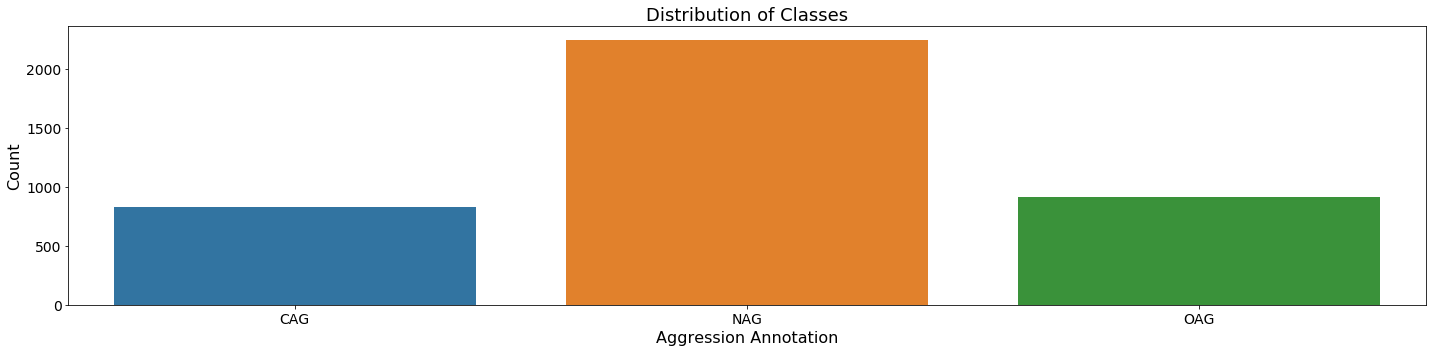

In [51]:
taskA_df = (hin.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = taskA_df,
        x = taskA_df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20, 5))

print('HINDI')
print(hin['Sub-task A'].value_counts())

In [ ]:
clean_text(hin, 'hi')

In [ ]:
hin.to_csv('./Data/cleaned hindi', index=False)

## BANGLA

In [ ]:
ben_train = pd.read_csv('Data/trac2_iben_train.csv')
ben_test = pd.read_csv('Data/trac2_iben_dev.csv')
ben = ben_train.append(ben_test)
ben.head()

In [ ]:
to_monolingual(ben, dest='bn')

In [ ]:
ben.sample(5)

In [ ]:
taskA_df = (ben.set_index(['ID', 'Sub-task A']).count(level='Sub-task A'))

barplot(df = taskA_df,
        x = taskA_df.index,
        y = "Text",
        title = "Distribution of Classes",
        label = "Aggression Annotation",
        ylabel = "Count",
        dim = (20, 5))

print('BANGLA')
print(ben['Sub-task A'].value_counts())

In [ ]:
clean_text(ben, 'bn')

In [ ]:
ben.to_csv('./Data/cleaned bangla', index=False)